<a href="https://colab.research.google.com/github/RafaelSperanca/bank_marketing/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando e importando os pacotes

In [ ]:
!pip install matplotlib >nul 2>&1
!pip install pandas >nul 2>&1
!pip install numpy >nul 2>&1
!pip install seaborn >nul 2>&1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

## Estudo inicial do dataframe

In [ ]:
bank = pd.DataFrame(pd.read_csv('/content/bank.csv', sep = ';'))

# Informações das Colunas

**age**: Idade do cliente.

**job**: Tipo de trabalho (categórica: 'admin.','operário','empresário','empregada doméstica','gerência','aposentado','autônomo','serviços','estudante','técnico','desempregado','desconhecido').

**marital**: Estado civil (categórica: 'divorciado','casado','solteiro','desconhecido'; nota: 'divorciado' significa divorciado ou viúvo).

**education**: Nível de escolaridade (categórica: 'básico.4anos','básico.6anos','básico.9anos','ensino.médio','analfabeto','curso.profissionalizante','diploma.universitário','desconhecido').

**default**: Tem crédito em inadimplência?

**balance**: Saldo médio anual em euros.

**housing**: Tem financiamento habitacional?

**loan**: Tem empréstimo pessoal?

**contact**: Tipo de comunicação de contato (categórica: 'celular','telefone').

**day**: Último dia de contato da semana.

**month**: Último mês de contato do ano (categórica: 'jan', 'fev', 'mar', ..., 'nov', 'dez').

**duration**: Duração do último contato, em segundos (numérica). Nota importante: este atributo afeta altamente o resultado alvo (ex: se duração=0 então y='não'). Contudo, a duração não é conhecida antes de uma ligação ser realizada. Além disso, após o fim da ligação y é obviamente conhecido. Assim, esta entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção é ter um modelo preditivo realista.

**campaign**: Número de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato).

**pdays**: Número de dias que se passaram depois que o cliente foi contatado pela última vez de uma campanha anterior (numérico; -1 significa que o cliente não foi contatado anteriormente).

**previous**: Número de contatos realizados antes desta campanha e para este cliente.

**poutcome**: Resultado da campanha de marketing anterior (categórica: 'fracasso','inexistente','sucesso').

**y**: O cliente contratou um depósito a prazo? (variável alvo).

In [ ]:
bank.shape

(4521, 17)

In [ ]:
# Verficando valores nulos

print(bank.isnull().sum().sort_values(ascending=False))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


## Análise Descritiva

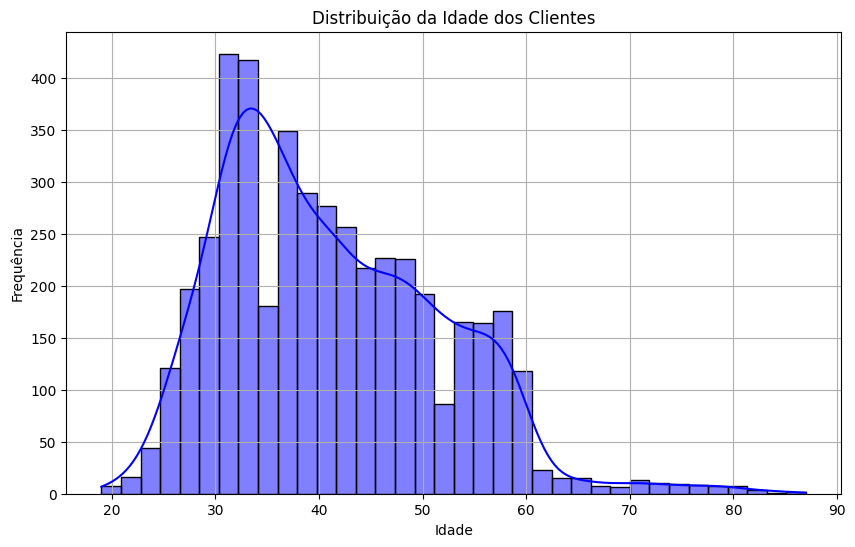

In [ ]:
# Verificando a distribuição da idade dos clientes

fig = plt.figure(figsize=(10, 6))
sns.histplot(data=bank, x='age',kde=True,color='blue')
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
fig.savefig('Distribuição da Idade')
plt.show()


/tmp/ipython-input-2975800051.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank, x='job', order=order, palette='Set3')


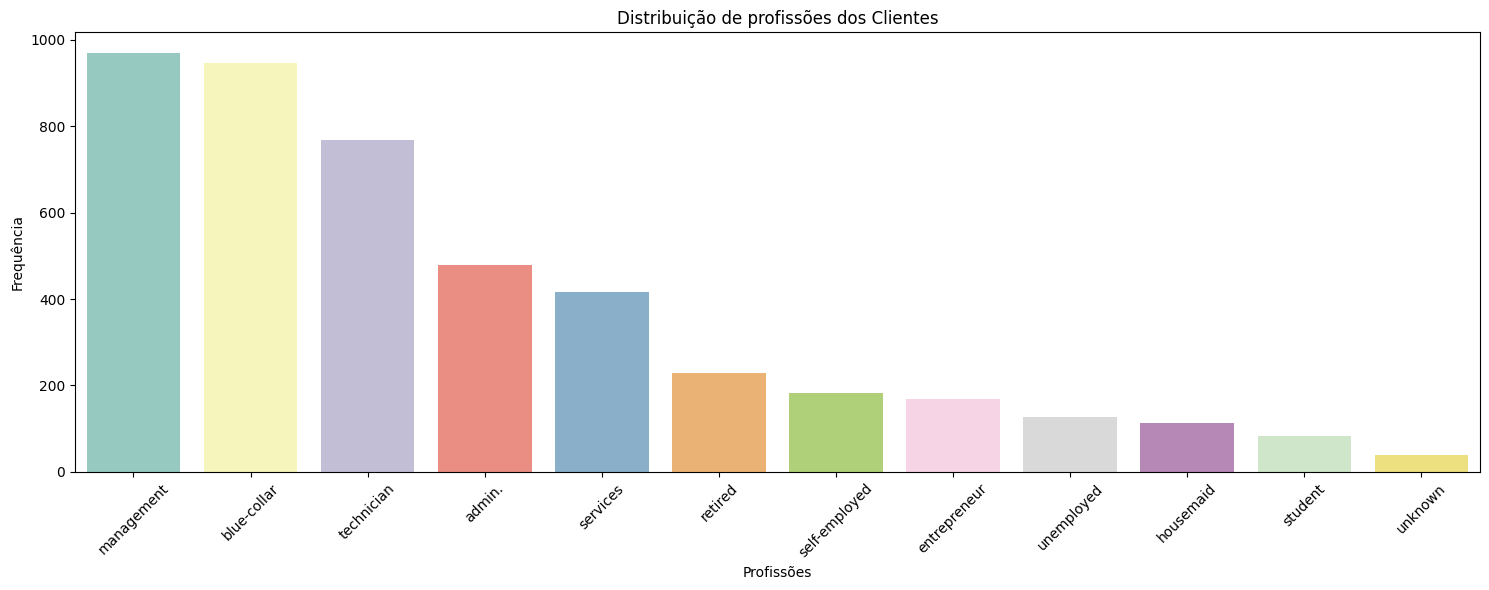

In [ ]:
# Verificando a distribuição das profissões dos clientes

fig = plt.figure(figsize=(15, 6))
order = bank['job'].value_counts().index
sns.countplot(data=bank, x='job', order=order, palette='Set3')
plt.title('Distribuição de profissões dos Clientes')
plt.xlabel('Profissões')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
fig.savefig('Distribuição de profissões dos Clientes')
plt.show()

In [ ]:
# Em percentual

# Contagem
bank_jos = bank['job'].value_counts().reset_index()
bank_jos.columns = ['job', 'count']

# Percentual
bank_jos['percentual'] = (bank_jos['count'] / bank_jos['count'].sum()) * 100

# Exibir
print(round(bank_jos))


              job  count  percentual
0      management    969        21.0
1     blue-collar    946        21.0
2      technician    768        17.0
3          admin.    478        11.0
4        services    417         9.0
5         retired    230         5.0
6   self-employed    183         4.0
7    entrepreneur    168         4.0
8      unemployed    128         3.0
9       housemaid    112         2.0
10        student     84         2.0
11        unknown     38         1.0


In [ ]:
# Tipo de contato mais frequente com os clientes

# Contagem
bank_contact = bank['contact'].value_counts().reset_index()
bank_contact.columns = ['contact', 'count']

# Percentual
bank_contact['percentual'] = (bank_contact['count'] / bank_contact['count'].sum()) * 100

# Exibir
print(round(bank_contact))

     contact  count  percentual
0   cellular   2896        64.0
1    unknown   1324        29.0
2  telephone    301         7.0


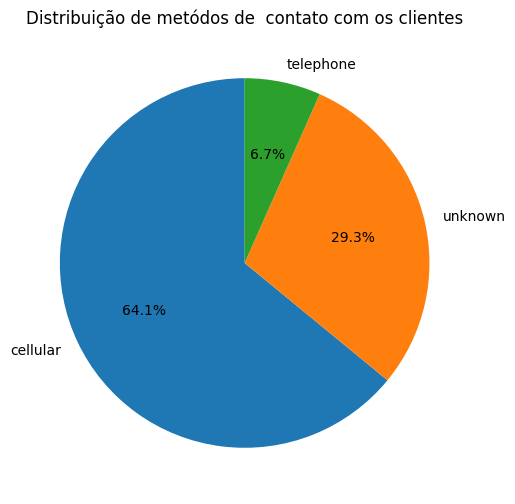

In [ ]:
# Gráfico de pizza

fig = plt.figure(figsize=(10, 6))
plt.pie(bank_contact['percentual'], labels= bank_contact['contact'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de metódos de  contato com os clientes')
fig.savefig('Distribuição de metódos de  contato com os clientes')
plt.show()

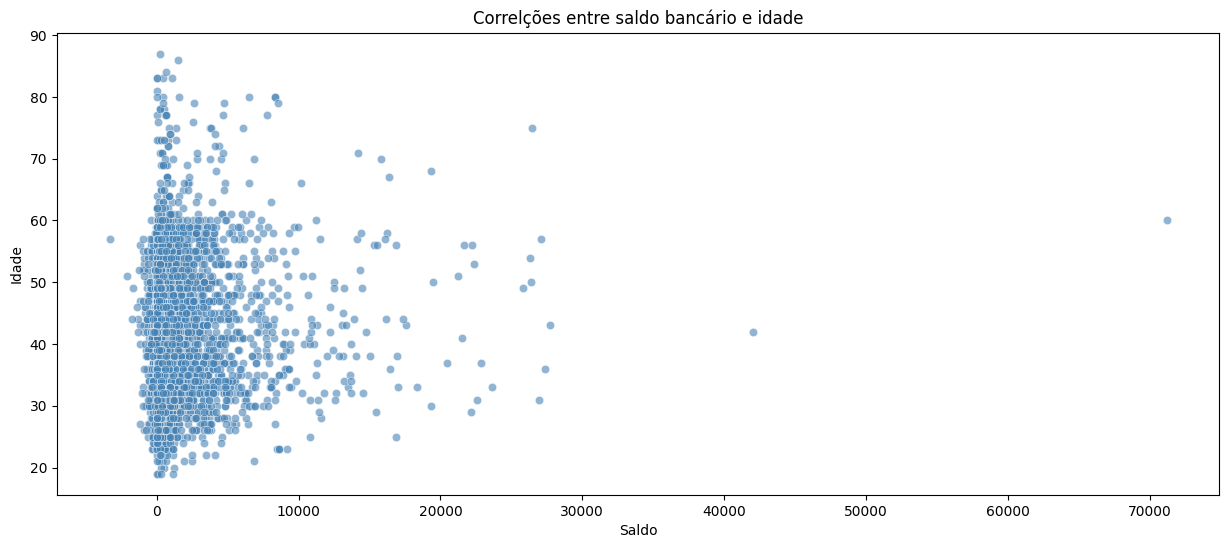

In [ ]:
# Observando a correlação entre o saldo bancário e a idade

fig = plt.figure(figsize=(15, 6))
sns.scatterplot(data=bank, x= 'balance', y = 'age', alpha=0.6,color='steelblue')
plt.title('Correlções entre saldo bancário e idade')
plt.xlabel('Saldo')
plt.ylabel('Idade')
fig.savefig('Correlções entre saldo bancário e idade')
plt.show()

## Tratando outliers


In [ ]:
# Calcular Q1, Q3 e IQR
Q1 = bank['balance'].quantile(0.25)
Q3 = bank['balance'].quantile(0.75)
IQR = Q3 - Q1

# Limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Outliers
outliers_balance = bank[(bank['balance'] < limite_inferior) | (bank['balance'] > limite_superior)]

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Limite inferior:", limite_inferior)
print("Limite superior:", limite_superior)
print("\nNúmero de outliers encontrados:", len(outliers_balance))

Q1: 69.0
Q3: 1480.0
IQR: 1411.0
Limite inferior: -2047.5
Limite superior: 3596.5

Número de outliers encontrados: 506


In [ ]:
# Filtrando

bankv1 = bank[(bank['balance'] >= limite_inferior) & (bank['balance'] <= limite_superior)]

In [ ]:
len(bankv1)

4015

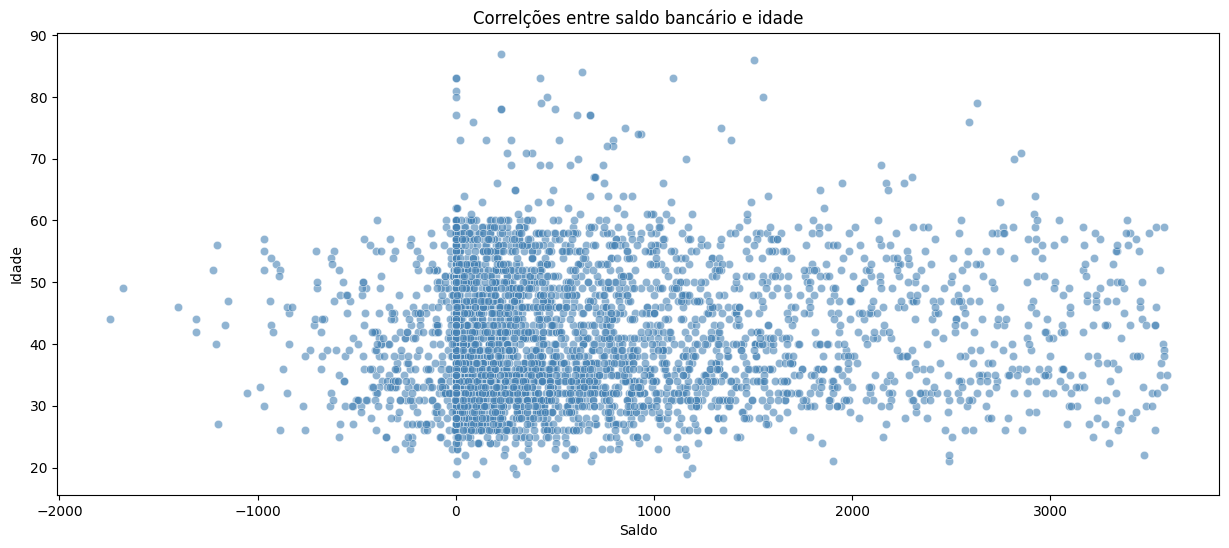

In [ ]:
# Observando a correlação entre o saldo bancário e a idade

fig = plt.figure(figsize=(15, 6))
sns.scatterplot(data=bankv1, x= 'balance', y = 'age', alpha=0.6,color='steelblue')
plt.title('Correlções entre saldo bancário e idade')
plt.xlabel('Saldo')
plt.ylabel('Idade')
fig.savefig('Correlções entre saldo bancário e idade1')
plt.show()

### Verificando a relação entre inadimplência, habitação e empréstimo com saldo bancário.

In [ ]:
# Saldo e inadimplência

default = bankv1.groupby('default')['balance'].mean().reset_index()
default = default.round(2)

print(default)

  default  balance
0      no   660.52
1     yes  -141.46


In [ ]:
# Saldo e habitação

housing = bankv1.groupby('housing')['balance'].mean().reset_index()
housing = housing.round(2)

print(housing)

  housing  balance
0      no   679.96
1     yes   620.29


In [ ]:
# Saldo e empréstimo

loan = bankv1.groupby('loan')['balance'].mean().reset_index()
loan = loan.round(2)

print(loan)

  loan  balance
0   no   676.82
1  yes   482.12


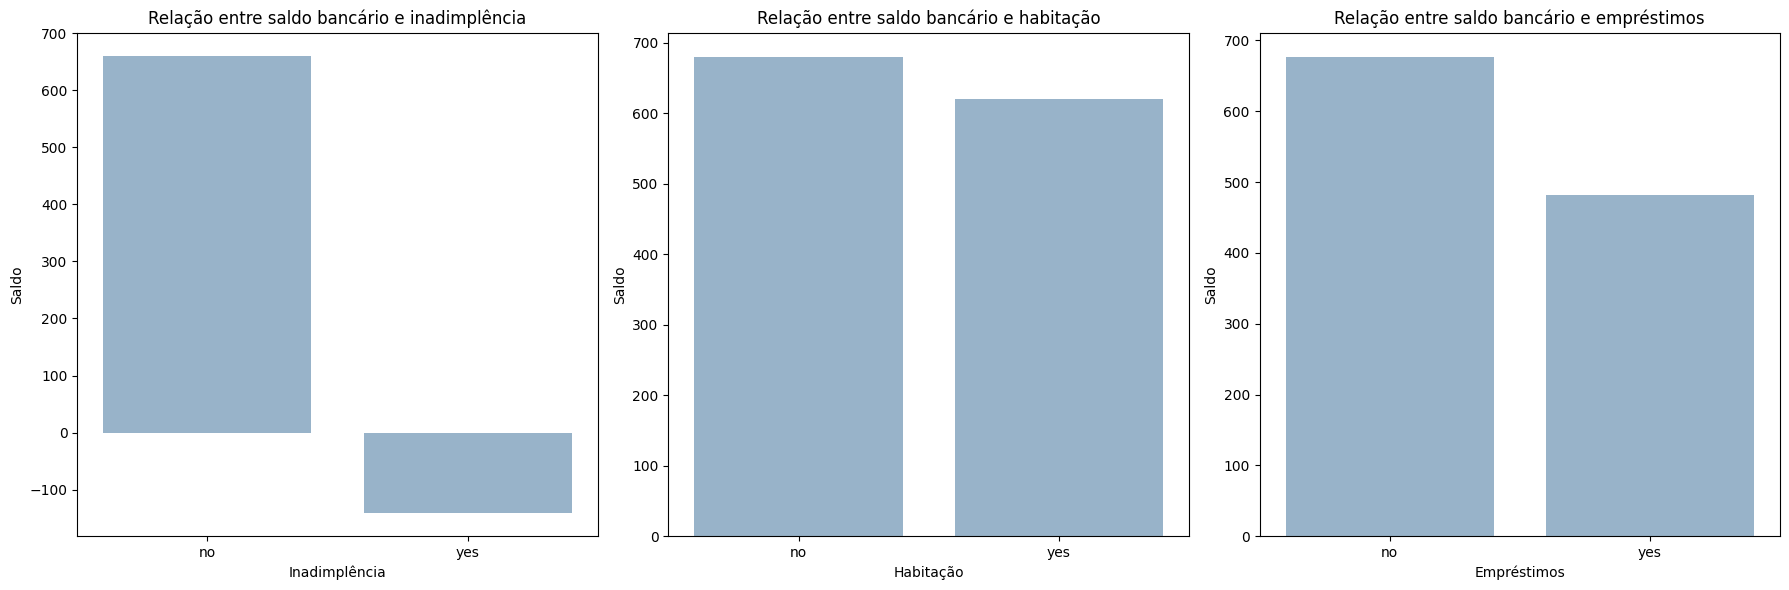

In [ ]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)

# Gráfico 1
plt.subplot(1, 3, 1)
sns.barplot(data=default, x= 'default', y = 'balance', alpha=0.6,color='steelblue')
plt.title('Relação entre saldo bancário e inadimplência')
plt.xlabel('Inadimplência')
plt.ylabel('Saldo')


# Gráfico 2
plt.subplot(1, 3, 2)
sns.barplot(data=housing, x= 'housing', y = 'balance', alpha=0.6,color='steelblue')
plt.title('Relação entre saldo bancário e habitação')
plt.xlabel('Habitação')
plt.ylabel('Saldo')


# Gráfico 3
plt.subplot(1, 3, 3)
sns.barplot(data=loan, x= 'loan', y = 'balance', alpha=0.6,color='steelblue')
plt.title('Relação entre saldo bancário e empréstimos')
plt.xlabel('Empréstimos')
plt.ylabel('Saldo')


plt.tight_layout()
fig.savefig('Quadro')
plt.show()


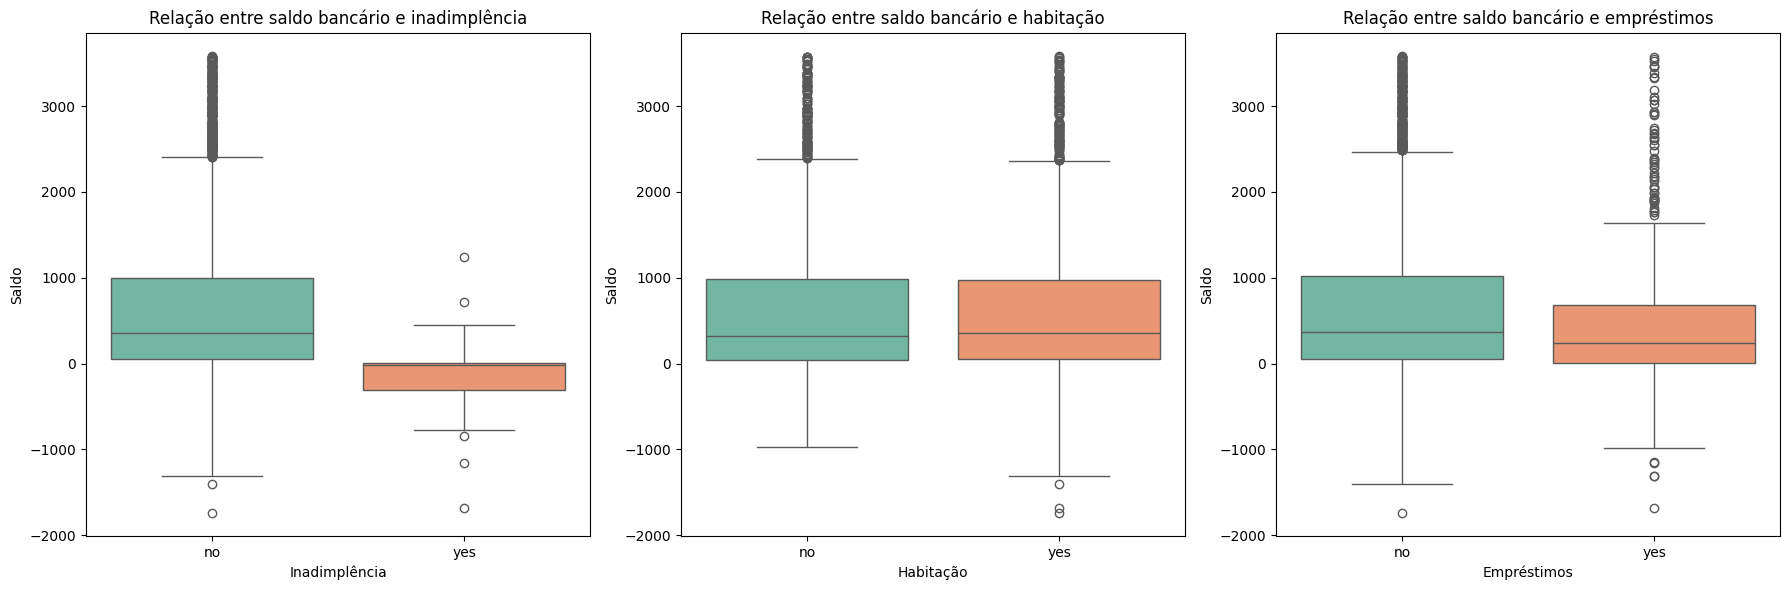

In [ ]:
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)

# Gráfico 1
plt.subplot(1, 3, 1)
sns.boxplot(data=bankv1, x='default', y='balance', hue='default',palette='Set2')
plt.title('Relação entre saldo bancário e inadimplência')
plt.xlabel('Inadimplência')
plt.ylabel('Saldo')


# Gráfico 2
plt.subplot(1, 3, 2)
sns.boxplot(data=bankv1, x='housing', y='balance', hue='housing',palette='Set2')
plt.title('Relação entre saldo bancário e habitação')
plt.xlabel('Habitação')
plt.ylabel('Saldo')


# Gráfico 3
plt.subplot(1, 3, 3)
sns.boxplot(data=bankv1, x='loan', y='balance', hue='loan',palette='Set2')
plt.title('Relação entre saldo bancário e empréstimos')
plt.xlabel('Empréstimos')
plt.ylabel('Saldo')


plt.tight_layout()
fig.savefig('boxplot')
plt.show()

In [ ]:
# Convertendo string em números

bankv1['y'] = bankv1['y'].replace({'yes':1,'no':0})
bankv1.head()

/tmp/ipython-input-2520055140.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bankv1['y'] = bankv1['y'].replace({'yes':1,'no':0})
/tmp/ipython-input-2520055140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankv1['y'] = bankv1['y'].replace({'yes':1,'no':0})


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,0


In [ ]:
bankv1=pd.DataFrame(bankv1)

bankv1.to_excel('bankv1.xlsx')

### Proporção de Aquisição do Produto (Inadimplência, Habitação e Empréstimos)

In [ ]:
# Agrupa por inadimplência e calcula soma e total
default_y = bankv1.groupby('default')['y'].agg(['sum','count']).reset_index()

In [ ]:
# Calcula a proporção de "sim" (y=1) dentro de cada grupo

default_y['proporcao'] = (default_y['sum'] / default_y['count'] * 100).round(1).astype(str) + '%'

In [ ]:
# Renomeia colunas
default_y.rename(columns={
    'default':'Inadimplência',
    'sum':'Aquisições',
    'count':'Total Clientes',
    'proporcao':'Taxa de Aquisição'
}, inplace=True)

print("Proporção de Aquisição do Produto por Inadimplência:\n")
print(default_y)

Proporção de Aquisição do Produto por Inadimplência:

  Inadimplência  Aquisições  Total Clientes Taxa de Aquisição
0            no         440            3941             11.2%
1           yes           9              74             12.2%


In [ ]:
# Agrupa por habitação e calcula soma e total
housing_y = bankv1.groupby('housing')['y'].agg(['sum','count']).reset_index()

# Calcula a proporção de "sim" (y=1) dentro de cada grupo
housing_y['proporcao'] = (housing_y['sum'] / housing_y['count'] * 100).round(1).astype(str) + '%'

# Renomeia colunas
housing_y.rename(columns={
    'housing':'Habitação',
    'sum':'Aquisições',
    'count':'Total Clientes',
    'proporcao':'Taxa de Aquisição'
}, inplace=True)

print("Análise de Aquisição do Produto por    :\n")
print(housing_y)

Análise de Aquisição do Produto por Habitação:

  Habitação  Aquisições  Total Clientes Taxa de Aquisição
0        no         255            1712             14.9%
1       yes         194            2303              8.4%


In [ ]:
# Agrupa por inadimplência e calcula soma e total
loan_y = bankv1.groupby('loan')['y'].agg(['sum','count']).reset_index()

# Calcula a proporção de "sim" (y=1) dentro de cada grupo
loan_y['proporcao'] = (loan_y['sum'] / loan_y['count'] * 100).round(1).astype(str) + '%'

# Renomeia colunas
loan_y.rename(columns={
    'loan':'Empréstimos',
    'sum':'Aquisições',
    'count':'Total Clientes',
    'proporcao':'Taxa de Aquisição'
}, inplace=True)

print("Proporção de Aquisição do Produto por Empréstimos:\n")
print(loan_y)

Proporção de Aquisição do Produto por Empréstimos:

  Empréstimos  Aquisições  Total Clientes Taxa de Aquisição
0          no         409            3374             12.1%
1         yes          40             641              6.2%


In [ ]:
# Verificando a correlação de Pearson

correlacao = bankv1['age'].corr(bankv1['balance'])
print(f"Correlação entre idade e renda: {correlacao:.3f}")

Correlação entre idade e renda: 0.066


In [ ]:
# Pearson

correlacao, p_valor = pearsonr(bankv1['age'], bankv1['balance'])

print(f"Correlação de Pearson: {correlacao:.3f}")
print(f"P-valor: {p_valor:.3f}")

# Interpretação automática
if p_valor < 0.05:
    print("✅ Correlação estatisticamente significativa")
else:
    print("❌ Correlação NÃO é estatisticamente significativa")

Correlação de Pearson: 0.066
P-valor: 0.000
✅ Correlação estatisticamente significativa


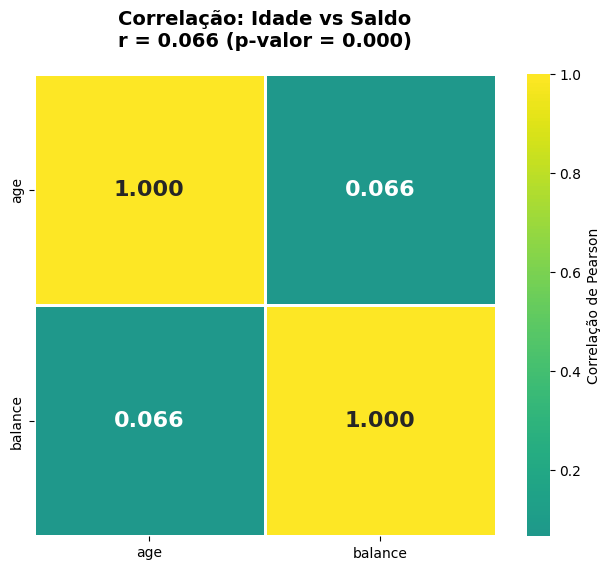

In [ ]:
# Calcular correlação
correlacao, p_valor = pearsonr(bankv1['age'], bankv1['balance'])

# Selecionar apenas as duas variáveis
dados_correlacao = bankv1[['age', 'balance']].corr()

# Criar mapa de calor
fig = plt.figure(figsize=(8, 6))
sns.heatmap(dados_correlacao,
            annot=True,                    # Mostrar valores
            cmap='viridis',              # Cores vermelho-amarelo-azul
            center=0,                      # Centro em 0
            square=True,                   # Células quadradas
            fmt='.3f',                    # 3 casas decimais
            cbar_kws={'label': 'Correlação de Pearson'},
            linewidths=2,                 # Linhas grossas entre células
            annot_kws={'size': 16, 'weight': 'bold'})  # Texto grande e negrito

plt.title(f'Correlação: Idade vs Saldo\nr = {correlacao:.3f} (p-valor = {p_valor:.3f})',
          fontsize=14, fontweight='bold', pad=20)
fig.savefig('Idade vs Saldo')

In [ ]:
conversion_rates = bankv1.groupby(['education', 'loan'])['y'].mean().reset_index()

# Pivotar a tabela para o formato do mapa de calor
heatmap_data = conversion_rates.pivot(index='loan', columns='education', values='y')

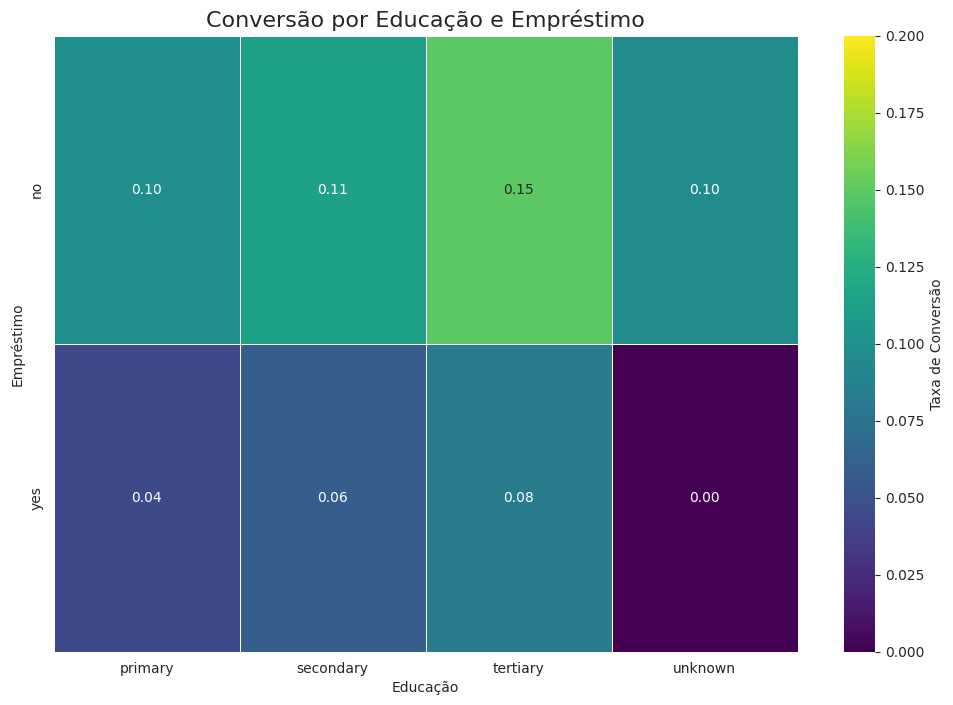

In [ ]:
# Criando o mapa de calor
fig = plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=.5,
    cbar_kws={'label': 'Taxa de Conversão'},
    vmin=0, vmax=0.2
)


plt.title('Conversão por Educação e Empréstimo', fontsize=16)
plt.xlabel('Educação')
plt.ylabel('Empréstimo')
fig.savefig('Taxa de Conversão por Educação e Empréstimo')

### Probabilidade condicional

In [ ]:
# Contagem da interseção (A e B)
cond_A_e_B = bankv1[(bankv1['y'] == 1) & (bankv1['previous'] > 0)]
total_A_e_B = len(cond_A_e_B)
print(f"Total de casos com A e B: {total_A_e_B}")

# O total de B
total_B = len(bankv1[(bankv1['previous'] > 0)])
print(f"Total de casos com B: {total_B}")

# Cálculo da probabilidade condicional
probabilidade_condicional = (total_A_e_B / total_B)*100
print(f"A probabilidade condicional é: {probabilidade_condicional:.4f}")

Total de casos com A e B: 156
Total de casos com B: 708
A probabilidade condicional é: 22.0339
